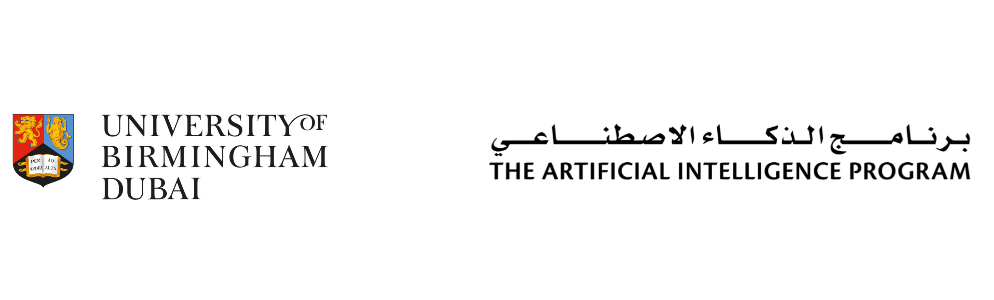

# Classification Exercises

## Importing Libraries & Functions

In [1]:
# Import libraries
import numpy as np # NumPy is used for performing fast, efficient numerical operations on collections of data
import pandas as pd # Pandas allows you to create dataframes (tables) to view and manipoulate your data

from sklearn import datasets # This allows you to import and use default datasets for toy examples
from sklearn.model_selection import train_test_split # This is a function that divides your data into train, test splits
from sklearn.model_selection import KFold, StratifiedKFold # These functions allow you to perform cross-validation
from sklearn.neighbors import KNeighborsClassifier # This is a fast, default implementation of the K Nearest neighbors classification algorithm
from sklearn.linear_model import LogisticRegression # This is a fast, default implementation of the Logistic Regression classification algorithm
from sklearn.metrics import ConfusionMatrixDisplay # This is a function that allows you to plot your confusion matrix
from sklearn import tree # This is a fast, default implementation of decision trees
from sklearn.svm import SVC # This is a fast, default implementation of support vector classifier (support vector machine for classification)
from sklearn.datasets import fetch_openml

from collections import Counter # Useful for calculating the number of instances (see BONUS material)

import matplotlib.pyplot as plt # This is a famous library that enables you to plot graphs and visualizations

## Exploratory Data Analysis

You can find the column names of the Iris dataset **[here](https://archive.ics.uci.edu/dataset/53/iris)**.

This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. **One class is linearly separable from the other 2; the latter are not linearly separable from each other.**

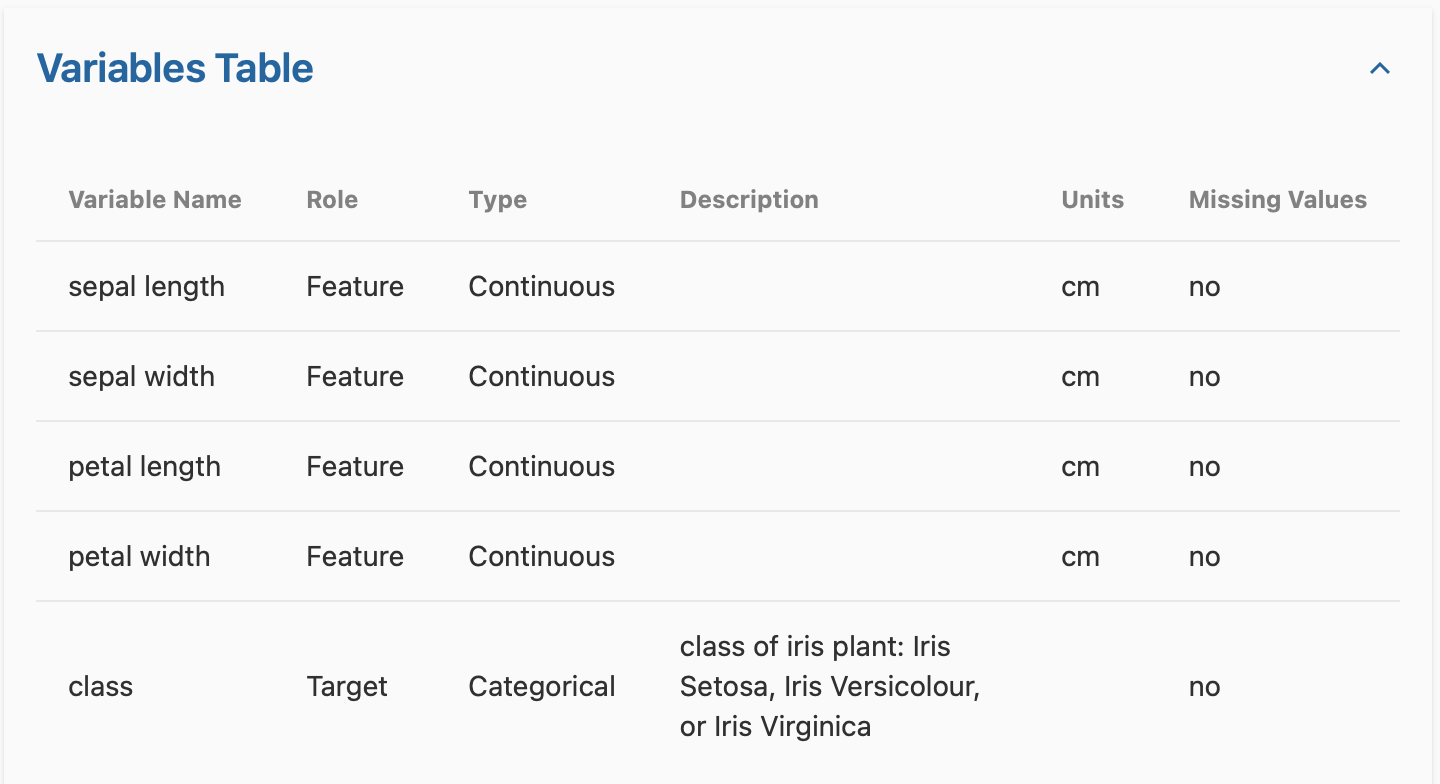



### Loading the Dataset

In [2]:
# Let's first import the dataset

iris = datasets.load_iris()

# Get iris features (X) and labels (y)
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert X to Pandas Dataframe
column_names = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)']
iris_df = pd.DataFrame(X, columns=column_names)

iris_df['Species'] = [target_names[i] for i in y] # Set your actual class names (not just 0, 1, 2)

print(iris_df.head()) # Display the first 5 rows of the Iris Dataframe (Table)

   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


### Visualizing the Dataset

**<font color="red">TO DO:</font>**
<font color="red">
1. Visualize the data by plotting the points.
2. <font color="red">  Set the X and Y Axis labels and plot title using the same technique as before in previous exercises</font>

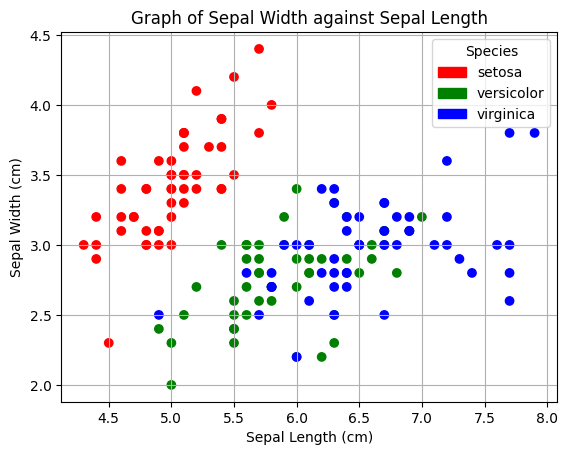

In [3]:
# 2-feature 2D Visualization

import matplotlib.patches as mpatches

# Define consistent colors
color_map = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
species_colors = iris_df['Species'].map(color_map)

# Visualize 2 features along the axes and color points using labels (class labels are shown by color)
scatter = plt.scatter(x=iris_df['Sepal Length (cm)'], y=iris_df['Sepal Width (cm)'], c=species_colors)

# Set labels for x-axis, y-axis, and plot the title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Graph of Sepal Width against Sepal Length')

# Manual legend
legend_patches = [mpatches.Patch(color=color_map[name], label=name) for name in target_names]
plt.legend(handles=legend_patches, title="Species")

plt.grid(True) # add grid for better visibility

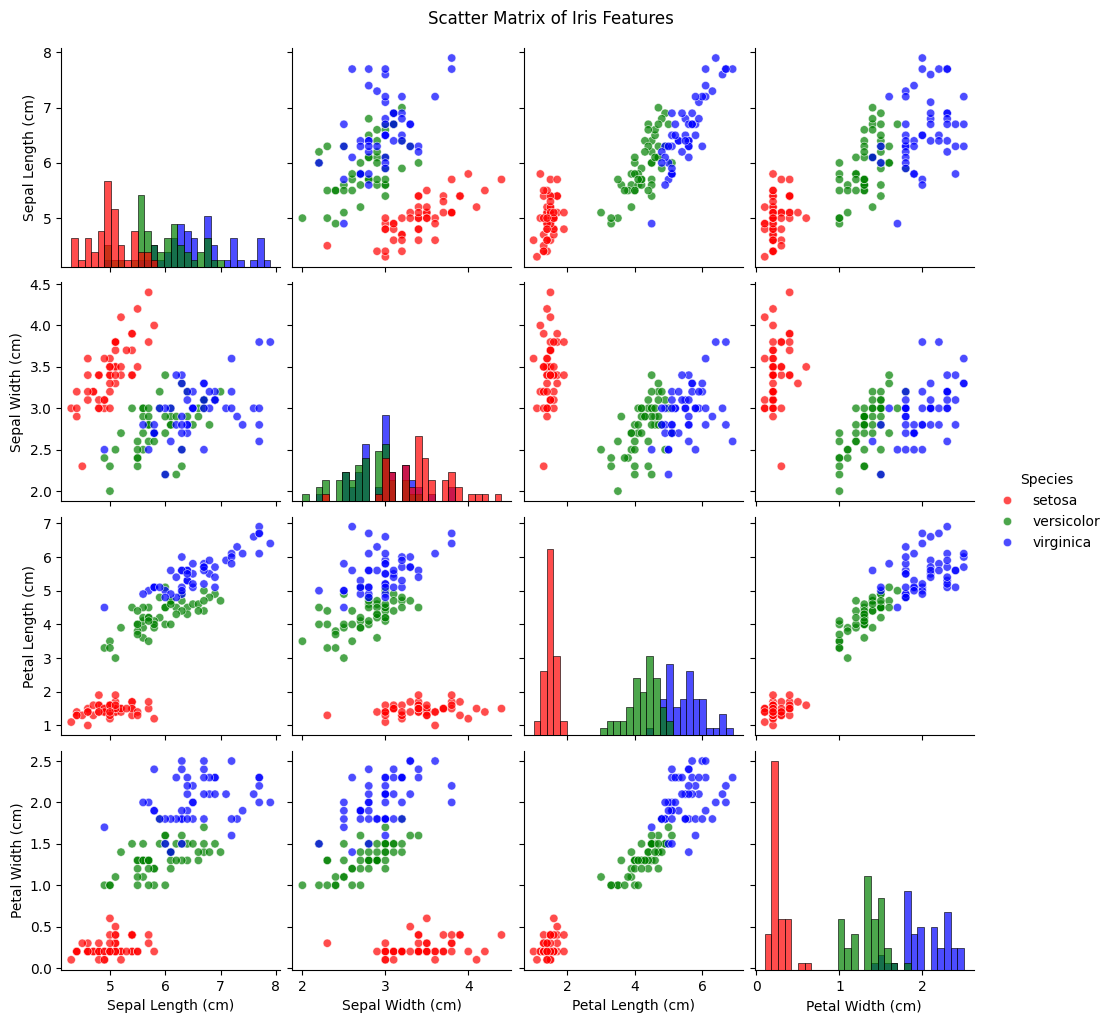

In [4]:
# Scatter Matrix to compare each 2 features

import seaborn as sns # Another data visualization and plotting library

# Create pair plot (scatter matrix)
sns.pairplot(
    iris_df,
    hue='Species',
    palette=color_map,
    diag_kind='hist',
    corner=False,
    plot_kws={'alpha': 0.7},
    diag_kws={'bins': 30, 'alpha': 0.7}
)

plt.suptitle("Scatter Matrix of Iris Features", y=1.02)
plt.show()

In [5]:
# 3D Visualization

from mpl_toolkits.mplot3d import Axes3D # for 3D plotting
import plotly.express as px # for interactive 3D plots


# Create 3D scatter plot
fig = px.scatter_3d(
    iris_df,
    x='Petal Length (cm)',
    y='Petal Width (cm)',
    z='Sepal Length (cm)',
    color='Species',
    title='Interactive 3D Scatter Plot of Iris Features',
    color_discrete_map=color_map,
    opacity=0.7
)

fig.update_layout(width=900, height=700)
fig.show()


## Data Split

**<font color="red">TO DO:</font>**
<font color="red">
1. Split the dataset into training and testing sets.
2. <font color="red"> Choose the ratio carefully: should we have more than 2 sets of data?</font>

### Train-Test Split

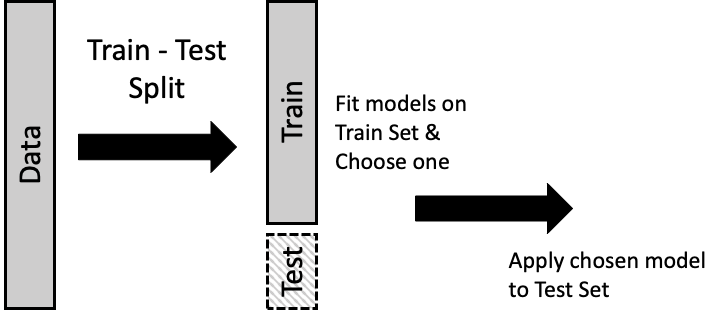

In [6]:
# Split data into train and test sets with 20% for testing, and 80% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Fixing random state for reproducibility


### Train-Val-Test Split

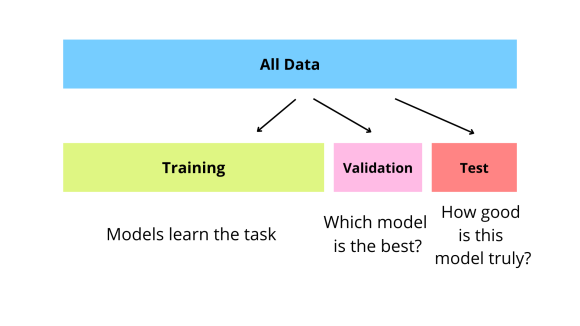

In [7]:
# Split data into train and test sets with 20% for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Fixing random state for reproducibility

# Divide remaining train data into train and validation split with 12.5% for validation, and 87.5% for training
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Total: 70% Train, 10% Val, 20% Test

### Cross Validation

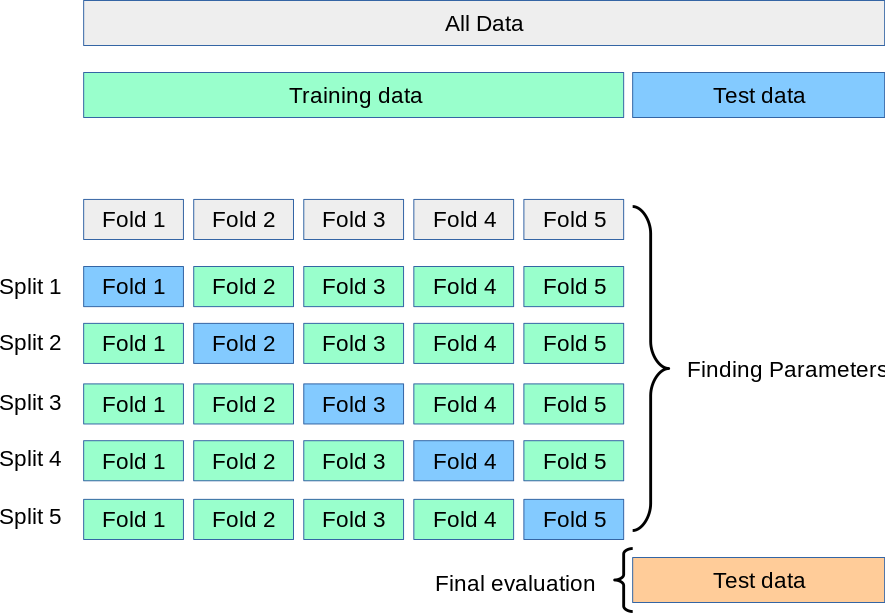

In [8]:
# Split data into train and test sets with 20% for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Fixing random state for reproducibility

kf = KFold(n_splits=5, shuffle=True)

# Split Training Data into 5 Folds
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
  print("-"*100)
  print(f"Split {i}:")
  X_fold, X_val = X_train[train_index], X_train[val_index]
  print(f"Number of train examples in this fold: {len(X_fold)}\nNumber of validation examples in this fold: {len(X_val)}")
  y_fold, y_val = y_train[train_index], y_train[val_index]


----------------------------------------------------------------------------------------------------
Split 0:
Number of train examples in this fold: 96
Number of validation examples in this fold: 24
----------------------------------------------------------------------------------------------------
Split 1:
Number of train examples in this fold: 96
Number of validation examples in this fold: 24
----------------------------------------------------------------------------------------------------
Split 2:
Number of train examples in this fold: 96
Number of validation examples in this fold: 24
----------------------------------------------------------------------------------------------------
Split 3:
Number of train examples in this fold: 96
Number of validation examples in this fold: 24
----------------------------------------------------------------------------------------------------
Split 4:
Number of train examples in this fold: 96
Number of validation examples in this fold: 24


## Models:

### K-Nearest Neighbours

K-Nearest Neighbors (KNN) is a **supervised** machine learning algorithm generally used for **classification**. It works by finding the "k" closest data points (neighbors) to a given, unseen input and makes a prediction based on the majority class. Since KNN makes no assumptions about the underlying data distribution, it makes it a non-parametric and instance-based learning method.

KNN does not learn from the training set immediately instead it stores the dataset and at the time of classification it performs an action on the dataset.

For example, consider the following table of data points containing two features:

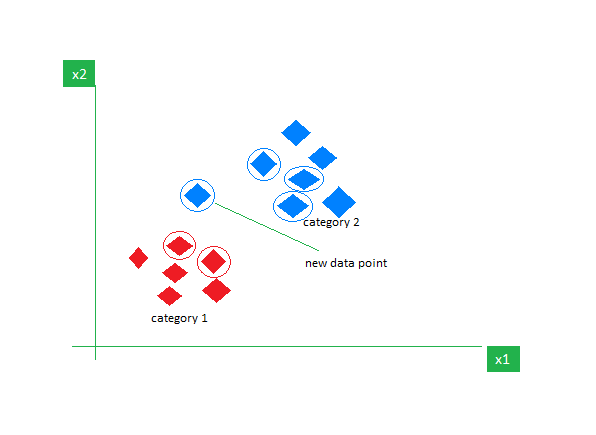

The new data point is classified as Category 2 because most of its closest neighbors are blue squares. KNN assigns the category based on the majority of neaby points. KNN works by using proximity nad majority voting to make predictions. You can use any distance metric but using elucidean distance (straight-line distance betweent wo poitns in a plane or space) is typical.

### **What is the 'K' in K Nearest Neighbors?**
In KNN, k is just a number that tells the algorithm how many nearby points or neighbors to look at when it makes a decision.
- The algorithm looks at the k closest points to the new one to decide.

### **How to choose the value of K?**
1. Cross-Validation is a good way to find the best value of k. Iterating across a range of possible values for k and training KNN on 5 folds of the data using that value of K and selecting the value of k based on the highest cross-validation accuracy.
2. Elbow Method is another way to select an optimal value of k. We draw a graph showing the error rate or accuracy for different k values. As k increases, the error usually drops at first. But after a certain point error stops decreasing qucikly. The point where the curve changes direction and looks like an "elbow" is usually the best choice for k.
Odd values for k: It's a good idea to use an odd number for k in classification problems. This helps avoid ties when deciding which class is the most common among the neighbors.


[source](https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/)

#### KNN (Determine k using Cross Validation)

In [9]:
# Implement K-Nearest Neighbors and find the most optimal K value using Cross Validation

from sklearn.metrics import accuracy_score

# Split data into train and test sets with 20% for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Fixing random state for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)#  5 fold

k_range = [1, 3, 5, 7, 9]

# Store average CV accuracy for each k
k_scores = {}

for k in k_range:
  fold_accuracies = []
  knn = KNeighborsClassifier(n_neighbors=k)

  for train_index, val_index in kf.split(X_train):
    X_fold, X_val = X_train[train_index], X_train[val_index]
    y_fold, y_val = y_train[train_index], y_train[val_index]

    knn.fit(X_fold, y_fold) # fit KNN model on fold
    y_pred = knn.predict(X_val) # used fitted KNN model on validation fold
    acc = accuracy_score(y_val, y_pred) # get acccuracy
    fold_accuracies.append(acc) # store accuracy for this fold (1 of 5)

  avg_score = np.mean(fold_accuracies)
  k_scores[k] = avg_score
  print(f"k = {k}, Cross-Validation Accuracy = {avg_score:.4f}")

# Select best k
best_k = max(k_scores, key=k_scores.get)
print(f"\n✅ Best k found: {best_k} with CV Accuracy = {k_scores[best_k]:.4f}")

# Train on full training set with best k
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"🎯 Test Set Accuracy with k={best_k}: {test_accuracy:.4f}")



k = 1, Cross-Validation Accuracy = 0.9417
k = 3, Cross-Validation Accuracy = 0.9417
k = 5, Cross-Validation Accuracy = 0.9500
k = 7, Cross-Validation Accuracy = 0.9500
k = 9, Cross-Validation Accuracy = 0.9417

✅ Best k found: 5 with CV Accuracy = 0.9500
🎯 Test Set Accuracy with k=5: 1.0000


#### KNN (Determine k using Eblow Method)

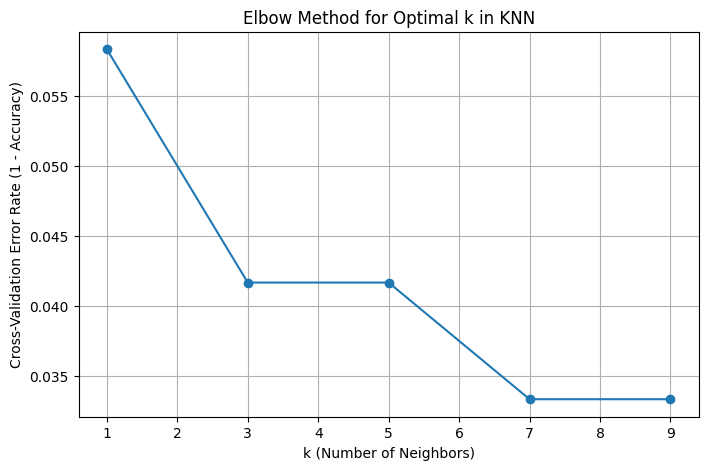

In [10]:
# Implement K-Nearest Neighbors and find the most optimal K value using Elbow Method


# Split data into train and test sets with 20% for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Fixing random state for reproducibility
kf = KFold(n_splits=4, shuffle=True, random_state=11)#  4 fold

k_range = [i for i in range(1,11) if i%2]

# Store average error rate for each k
error_rates = {}

for k in k_range:
  fold_error_rates = []
  knn = KNeighborsClassifier(n_neighbors=k)

  for train_index, val_index in kf.split(X_train):
    X_fold, X_val = X_train[train_index], X_train[val_index]
    y_fold, y_val = y_train[train_index], y_train[val_index]

    knn.fit(X_fold, y_fold) # fit KNN model on fold
    y_pred = knn.predict(X_val) # used fitted KNN model on validation fold
    acc = accuracy_score(y_val, y_pred) # get acccuracy
    error = 1 - acc # get error rate
    fold_error_rates.append(error) # store accuracy for this fold (1 of 5)

  avg_error = np.mean(fold_error_rates)
  error_rates[k] = avg_error

# ---------- PLOTTING THE ELBOW METHOD ----------
plt.figure(figsize=(8, 5))
plt.plot(list(error_rates.keys()), list(error_rates.values()), marker='o', linestyle='-')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Error Rate (1 - Accuracy)')
plt.title('Elbow Method for Optimal k in KNN')
plt.grid(True)
plt.show()

#### Decision Boundaries as K Varies

In the case of KNN, K controls the size of the neighborhood used to model the local statistical properties. A very small value for K makes the model more sensitive to local anomalies and exceptions, giving too many weight to these particular points (overfitting). On the contrary, a too large value of K would make the model ignore the local structure of the distribution you try to learn, and produce an underfitted model.

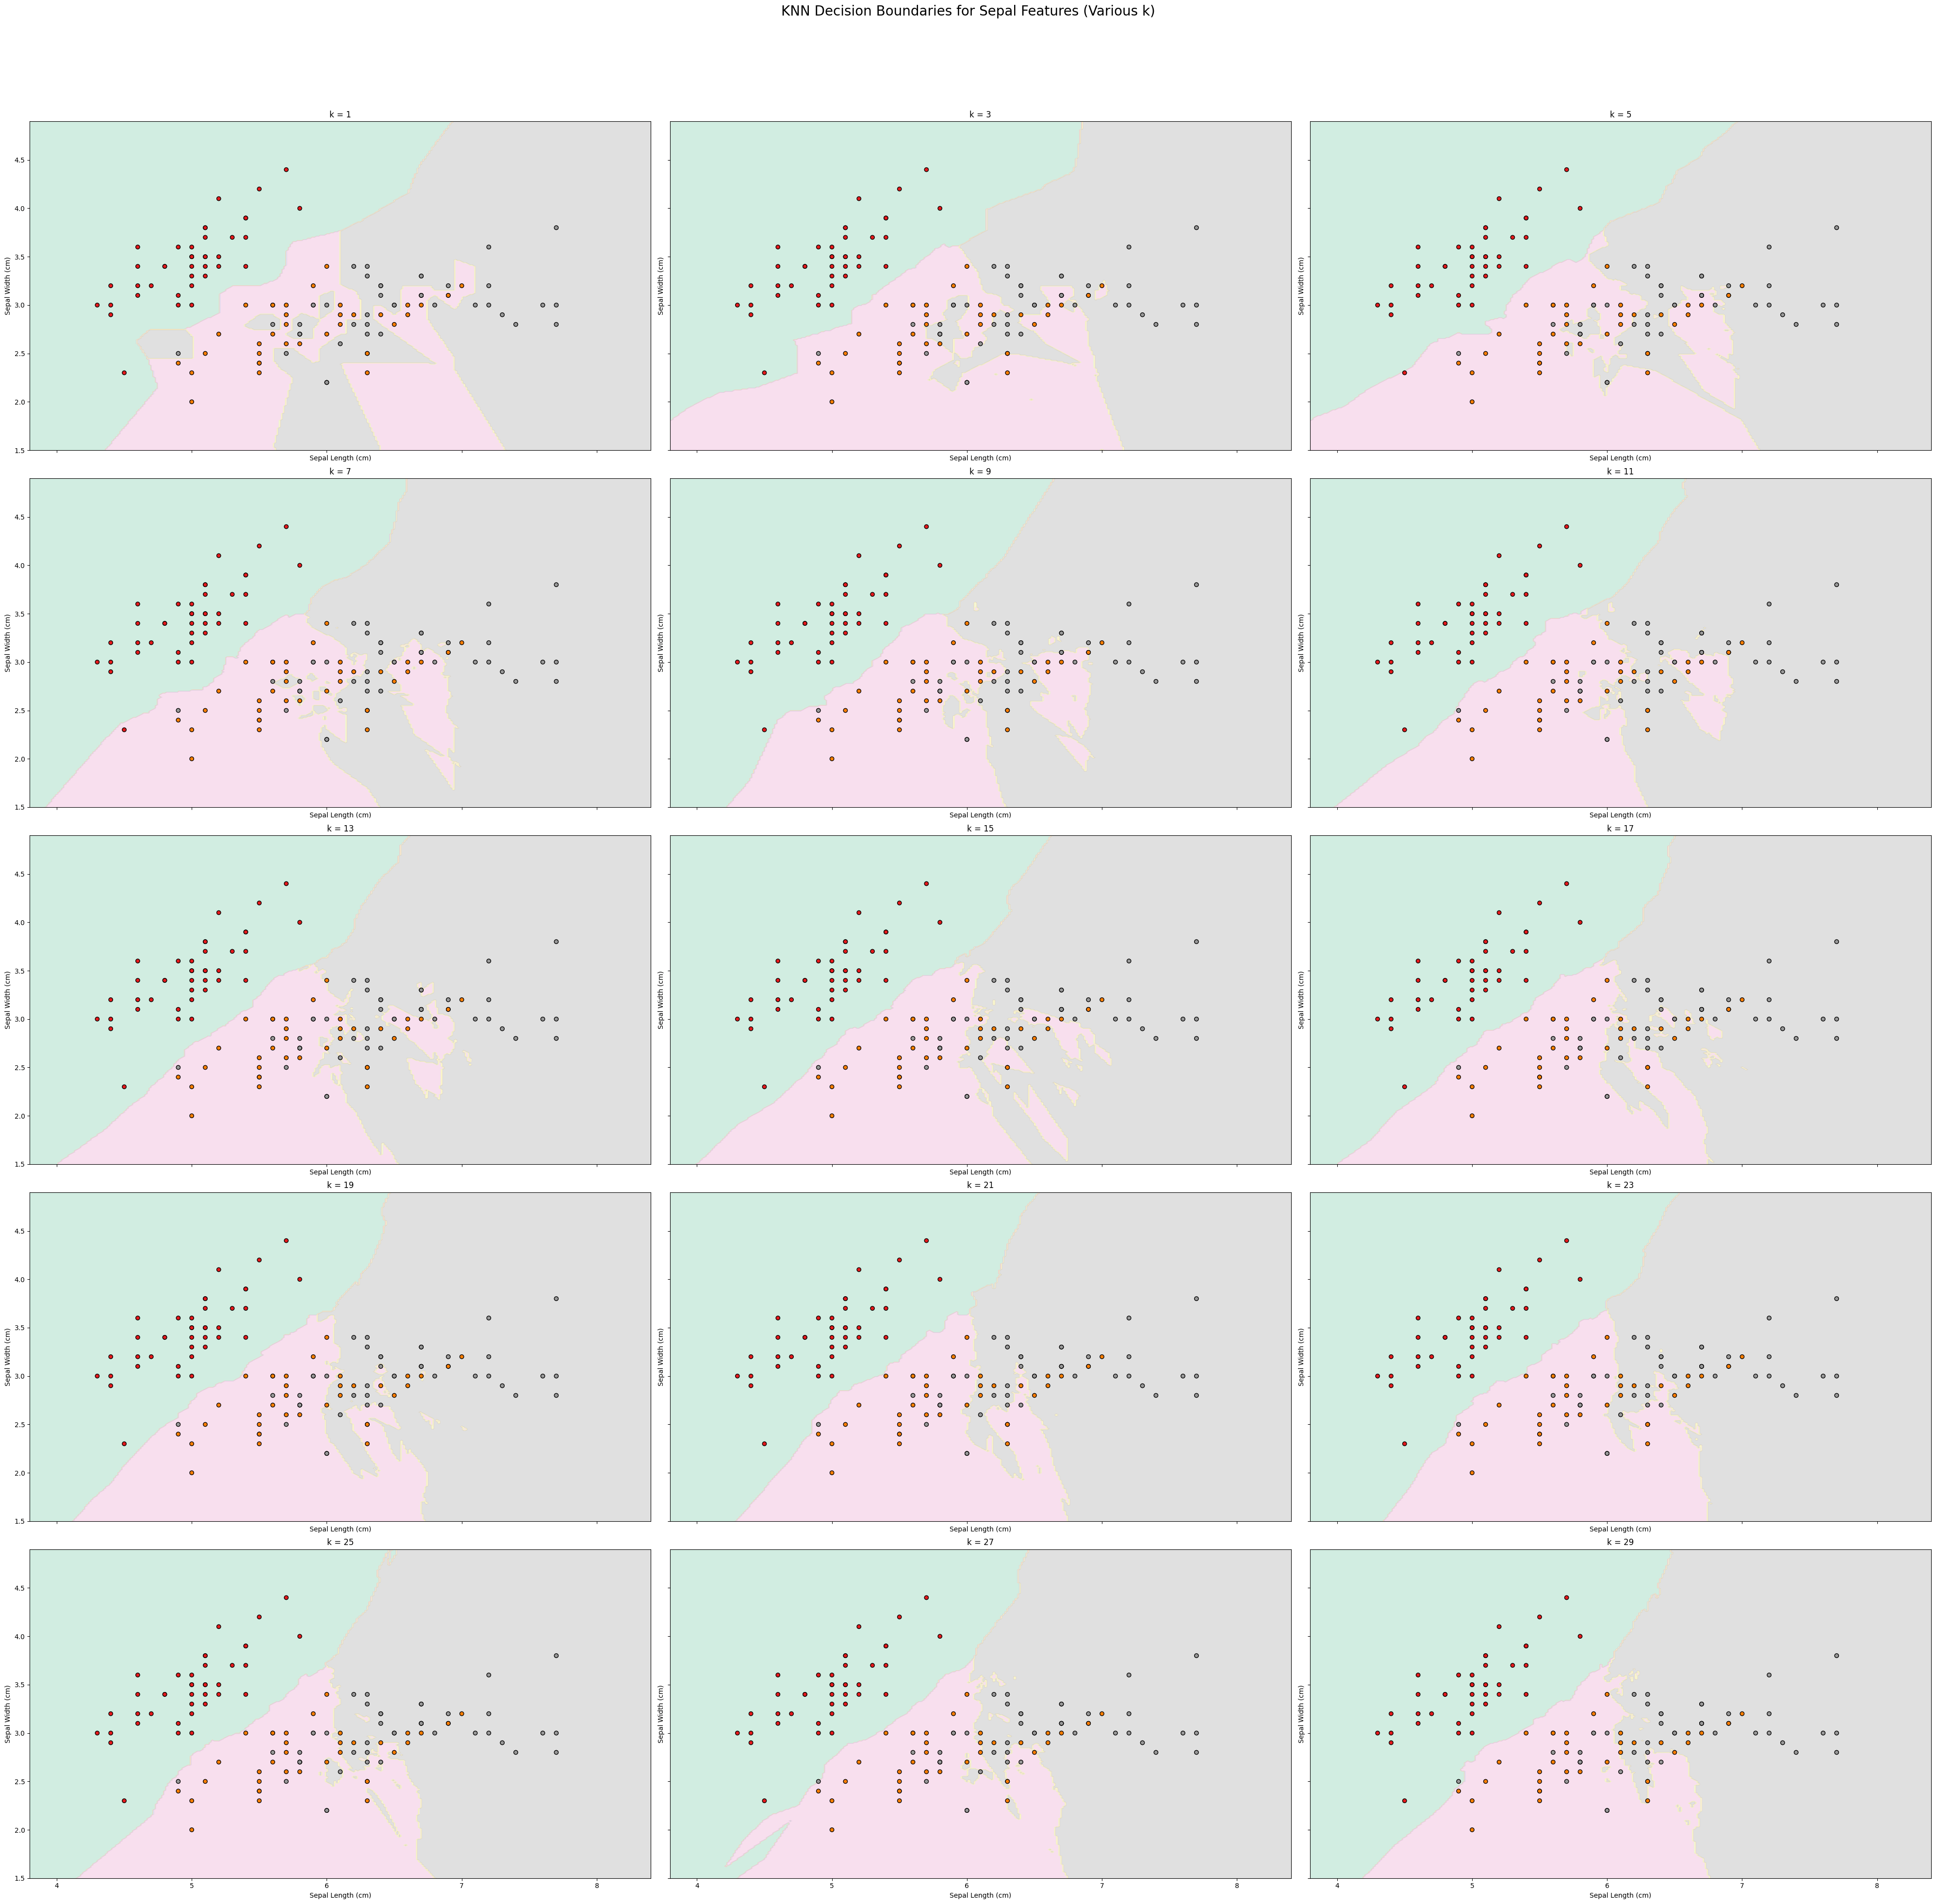

In [11]:
# Train on just the first two features (Sepal Length (cm) and Sepal Width (cm))
X_part = iris.data[:, [0, 1]]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_part, y, test_size=0.2, random_state=42)

# k values to visualize
k_range = [i for i in range(1, 31) if i % 2]  # 15 odd k values

# Create meshgrid
x_min, x_max = X_part[:, 0].min() - 0.5, X_part[:, 0].max() + 0.5
y_min, y_max = X_part[:, 1].min() - 0.5, X_part[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Colors
cmap_background = plt.cm.Pastel2
cmap_points = plt.cm.Set1

# Set up subplots in grid (e.g., n/3 rows x 3 cols)
n_cols = 3
n_rows = int(np.ceil(len(k_range) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(40, 40), sharex=True, sharey=True)
axes = axes.flatten()

# Loop through each k value
for idx, (ax, k) in enumerate(zip(axes, k_range)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.6)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolor='k')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Sepal Length (cm)')
    ax.set_ylabel('Sepal Width (cm)')

# Hide any unused subplots (if grid is larger than number of k values)
for ax in axes[len(k_range):]:
    ax.set_visible(False)

fig.suptitle('KNN Decision Boundaries for Sepal Features (Various k)', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### Decision Trees:

Decision Trees are (generally) binary trees that classify data through thresholding the features and splitting the data based on a sequence of steps. To train a decision tree, a criterion is used and evaluated recursively to see what possible split (thresholds for numeric features) minimizes/maximizes that criterion as much as possible.

**Criterions commonly used:**
1. Gini impurity
  - Measures the probability of incorrect classification of a randomly chosen element if it were randomly labeled according to the class distribution in the subset. A lower Gini value indicates a purer node. It is used in algorithms like CART and is computationally efficient.
2. Information gain (change in entropy)
  - Based on the concept of entropy from information theory. Entropy measures the amount of disorder or uncertainty. Information gain represents the reduction in entropy after a dataset is split on a feature — a higher gain means a more informative split. Used in algorithms like ID3 and C4.5.

**Splitting Process:**
At each node:
1. The algorithm evaluates all features and potential thresholds (for numeric data).
2. For each possible split, it calculates the criterion (e.g., Gini impurity or information gain) for the resulting child nodes.
3. The split that results in the best improvement in the criterion (lowest Gini or highest information gain) is chosen.
4. This process is recursive — child nodes become new roots for further splits until stopping conditions are met.

**Stopping Criteria:**
Tree growth continues until one of the following is true:
- All samples in a node belong to the same class (pure node).
- The maximum depth of the tree is reached.
- The number of samples in a node is less than a predefined threshold (to avoid overfitting).
- The gain from a split is below a minimum threshold.

**As always, these thresholds are hyperparameters that can be tuned using cross-validation!**

**Prediction:**
Once trained, a decision tree predicts by routing an input down the tree:
1. At each internal node, a condition on a feature is checked.
2. The input follows the left or right branch depending on the result.
3. At a leaf node, the class label (or distribution, in probabilistic outputs) is returned.

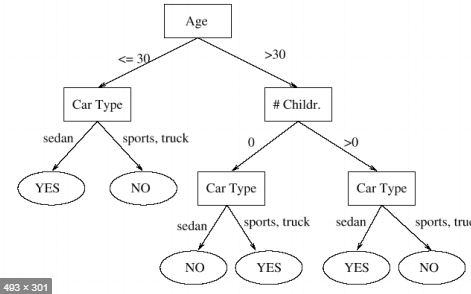

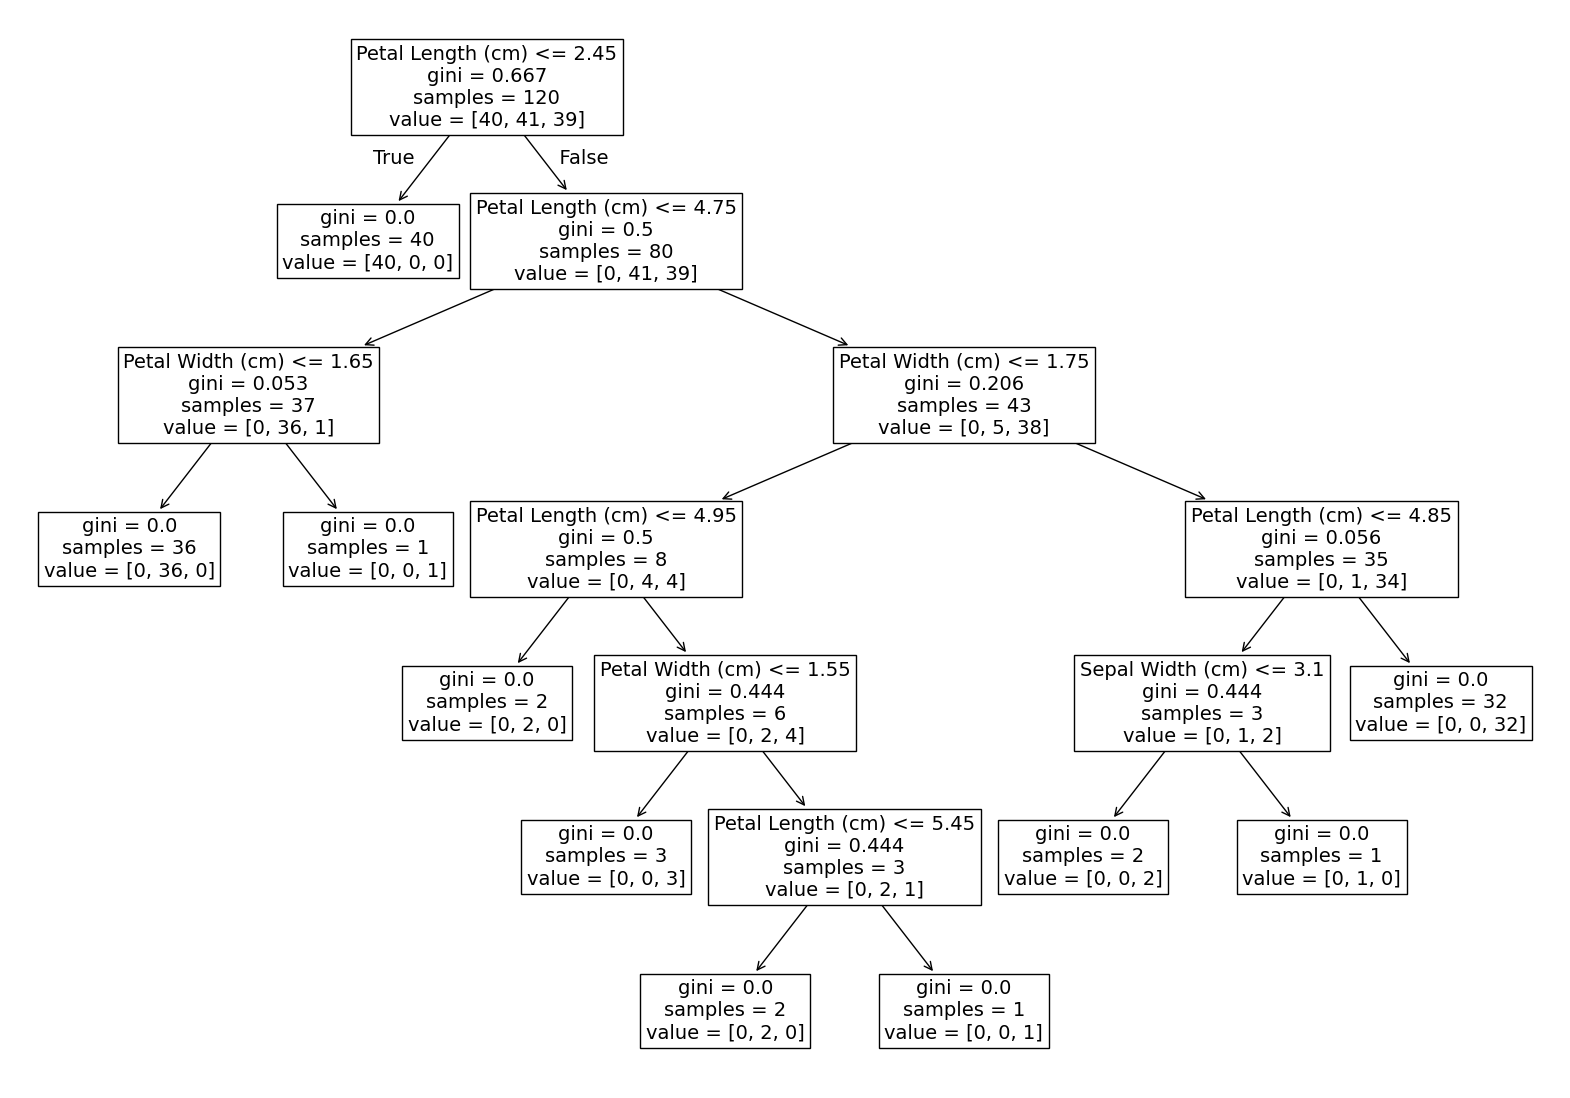

In [12]:
# Fit decision tree to training set

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42) # initialize Decision Tree
clf = clf.fit(X_train, y_train) # train the Decision Tree on the data

# Visualize with feature names and class names
plt.figure(figsize=(20, 14))
tree.plot_tree(
    clf,
    feature_names=column_names,        # Use original column names
    fontsize=14
)
plt.show()

Cross-validated Results:

Max Depth: 1
Accuracy: 0.6000
Confusion Matrix (rows=True labels, cols=Predicted):


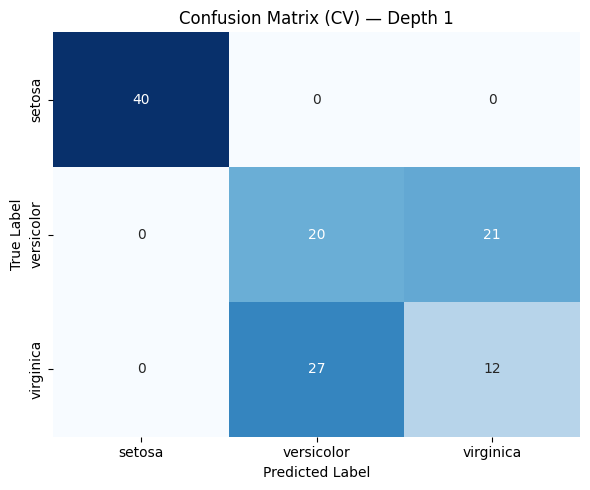

----------------------------------------
Max Depth: 2
Accuracy: 0.9167
Confusion Matrix (rows=True labels, cols=Predicted):


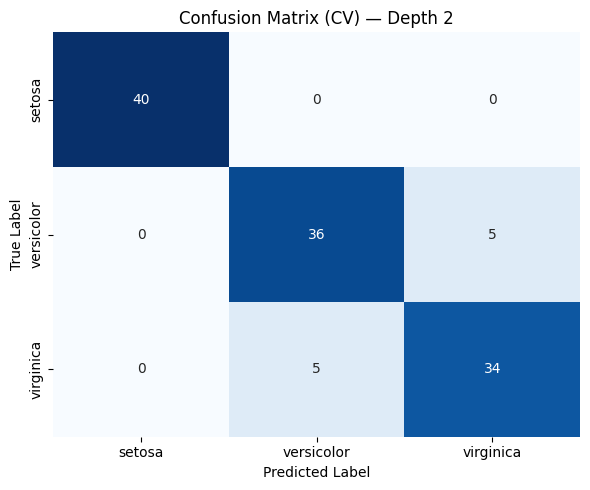

----------------------------------------
Max Depth: 3
Accuracy: 0.9250
Confusion Matrix (rows=True labels, cols=Predicted):


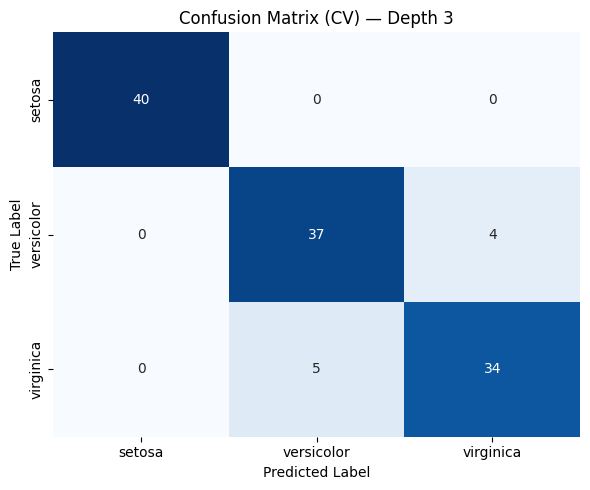

----------------------------------------
Max Depth: 4
Accuracy: 0.9167
Confusion Matrix (rows=True labels, cols=Predicted):


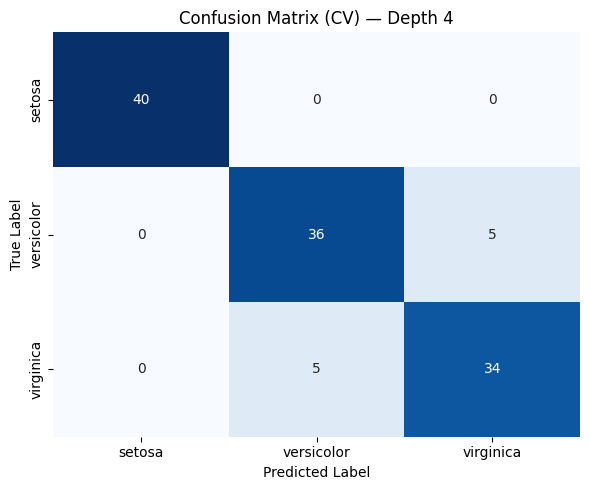

----------------------------------------
Max Depth: 5
Accuracy: 0.9167
Confusion Matrix (rows=True labels, cols=Predicted):


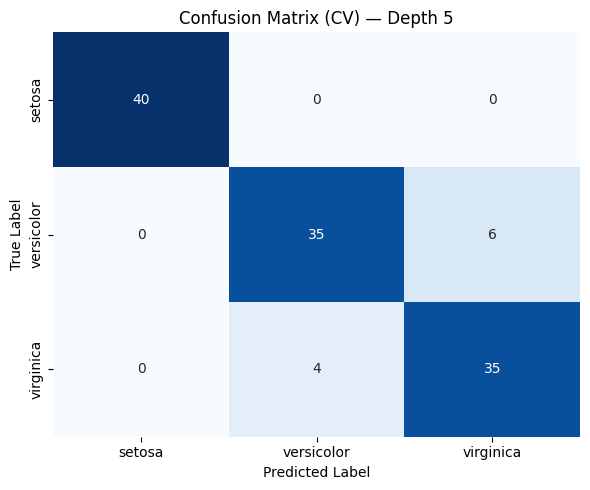

----------------------------------------
Max Depth: 6
Accuracy: 0.9167
Confusion Matrix (rows=True labels, cols=Predicted):


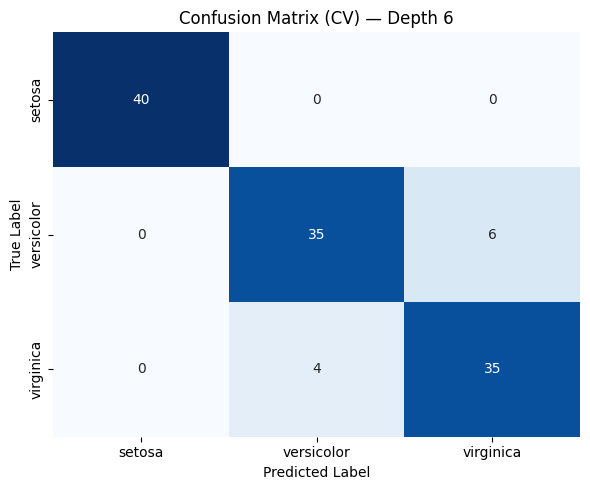

----------------------------------------

Best max_depth based on CV: 3 with accuracy 0.9250

Test Accuracy: 1.0000
Test Confusion Matrix (rows=True labels, cols=Predicted):


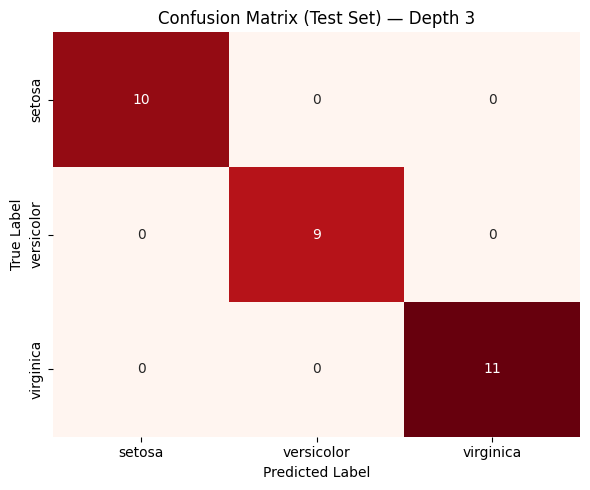

In [13]:
# Vary depth of tree

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm_df, title, mode):
    plt.figure(figsize=(6, 5))
    if mode=="train":
      sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    else:
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Split features and labels
X = iris_df.drop(columns=["Species"])
y = iris_df["Species"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)#  5 fold

max_depth_range = [1, 2, 3, 4, 5, 6]

best_accuracy = 0
best_depth = None

print("Cross-validated Results:\n")

for max_depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)

    # Cross-validated predictions
    y_pred = cross_val_predict(clf, X_train, y_train, cv=kf)

    # Accuracy
    acc = accuracy_score(y_train, y_pred)

    # Save best model info
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = max_depth

    # Confusion Matrix
    class_labels = iris_df["Species"].unique()
    cm = confusion_matrix(y_train, y_pred, labels=class_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    # Print cross-validation results for this max_depth value
    print(f"Max Depth: {max_depth}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix (rows=True labels, cols=Predicted):")
    plot_confusion_matrix(cm_df, f"Confusion Matrix (CV) — Depth {max_depth}", mode="train")
    print("-" * 40)

# Final evaluation on test set using best model
print(f"\nBest max_depth based on CV: {best_depth} with accuracy {best_accuracy:.4f}")

# Retrain on full training data
final_clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=best_depth, random_state=42)
final_clf.fit(X_train, y_train)
y_test_pred = final_clf.predict(X_test)

# Test accuracy and confusion matrix
test_acc = accuracy_score(y_test, y_test_pred)
class_labels_test = iris_df["Species"].unique()
test_cm = confusion_matrix(y_test, y_test_pred, labels=class_labels_test)
test_cm_df = pd.DataFrame(test_cm, index=class_labels_test, columns=class_labels_test)

# Print results and confusion matrix on test set using best max_depth value
print(f"\nTest Accuracy: {test_acc:.4f}")
print("Test Confusion Matrix (rows=True labels, cols=Predicted):")
plot_confusion_matrix(test_cm_df, f"Confusion Matrix (Test Set) — Depth {best_depth}", mode="test")


### SVMs:

SVM seeks to find a hyperplane (line or higher-dimensional line) that separates classes in a high-dimensional space with the maximum margin -- i.e, the distance between the hyperplane and the closest data points from each class.

**Margin and Support Vectors**
- **Support Vectors** are the data points that lie closest to the decision boundary (hyperplane). These are the critical elements that define the position and orientation of the hyperplane.
- **Hard Margin SVM** assumes data is linearly separable with no misclassifications.
- **Soft Margin SVM** introduces a slack variable to allow some misclassification. This is essential for real-world data where perfect separation isn't feasible.
  - High C (slack variable) = strong penalty for slack and model tries hard to minimize violations (low bias, high variance) -> may overfit.
  - Low C (slack variable) = allow more violations and model tolerates errors (high bias, low variance) -> may underfit.

**Kernels**:
- A kernel is a function that computes the similarity between two data points in a (possibly) higher-dimensional space--without explicitly transforming them into that space.
- Many datasets are not linearly separable in their original input space. Kernels allow SVM to implicitly map data to a higher-dimensional space where a linear separator (hyperplane) *can* be found.

**Multiclass Strategies with SVM:**

1. One-vs-Rest (OvR or One-vs-All):
  - For k classes, train k binary classifiers.
  - Each classifier separates one class from the rest.
  - At prediction time, the classifier with the highest confidence (typically the decision function value) is selected.
2. One-vs-One (OvO):
  - For k classes, train k(k-1)/2 binary classifiers for all possible pairs.
  - At prediction time, each classifier votes, and the class with the most votes wins.

  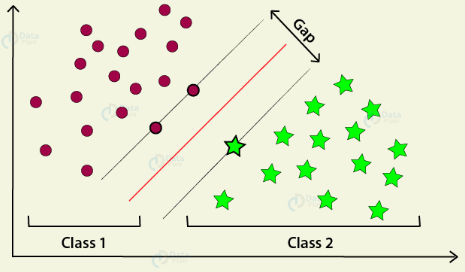



Test Accuracy: 1.0000
Test Confusion Matrix (rows=True labels, cols=Predicted):


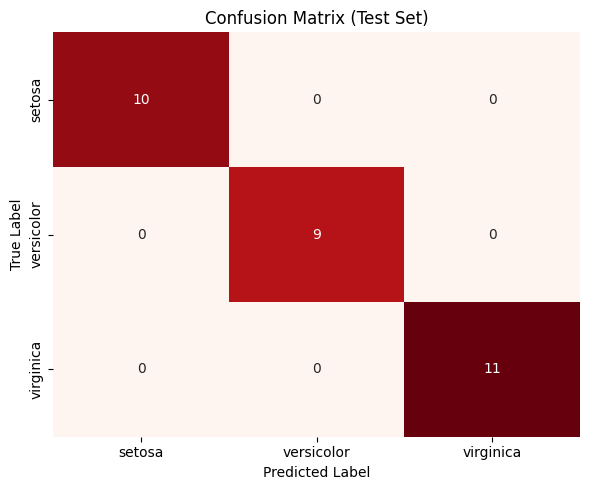

In [14]:
# Use SVM Model (OvR)

from sklearn.metrics import accuracy_score

# Split features and labels
X = iris_df.drop(columns=["Species"])
y = iris_df["Species"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C = 0.5
svm_model = SVC(kernel='linear', C=C) # initiailize SVM model
svm_model.fit(X_train, y_train) # train SVM model

y_test_pred = svm_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
class_labels_test = iris_df["Species"].unique()
test_cm = confusion_matrix(y_test, y_test_pred, labels=class_labels_test)
test_cm_df = pd.DataFrame(test_cm, index=class_labels_test, columns=class_labels_test)

# Print results and confusion matrix on test set using best max_depth value
print(f"\nTest Accuracy: {test_acc:.4f}")
print("Test Confusion Matrix (rows=True labels, cols=Predicted):")
plot_confusion_matrix(test_cm_df, f"Confusion Matrix (Test Set)", mode="test")


C: 0.01
kernel: linear
Accuracy: 0.8083
Confusion Matrix (rows=True labels, cols=Predicted):


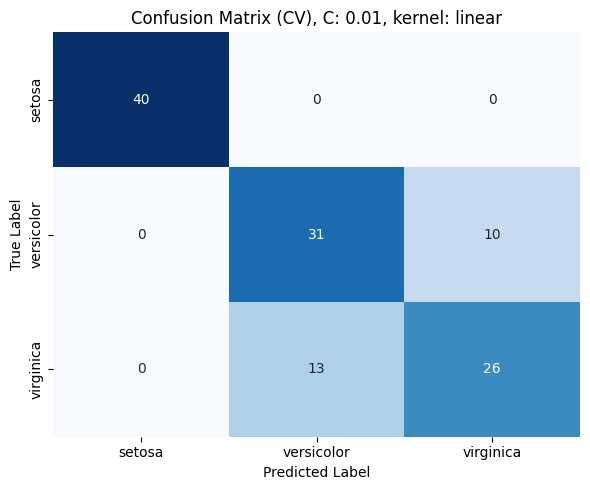

----------------------------------------
C: 0.01
kernel: poly
Accuracy: 0.8667
Confusion Matrix (rows=True labels, cols=Predicted):


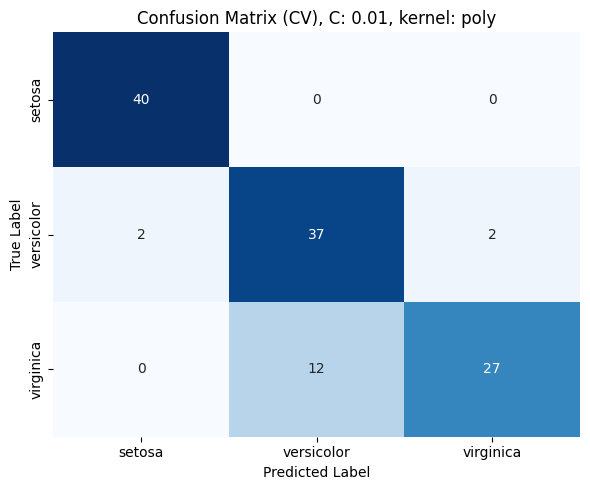

----------------------------------------
C: 0.5
kernel: linear
Accuracy: 0.9750
Confusion Matrix (rows=True labels, cols=Predicted):


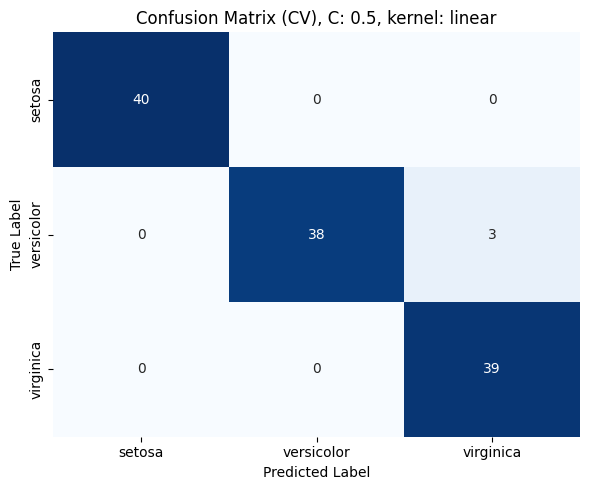

----------------------------------------
C: 0.5
kernel: poly
Accuracy: 0.9417
Confusion Matrix (rows=True labels, cols=Predicted):


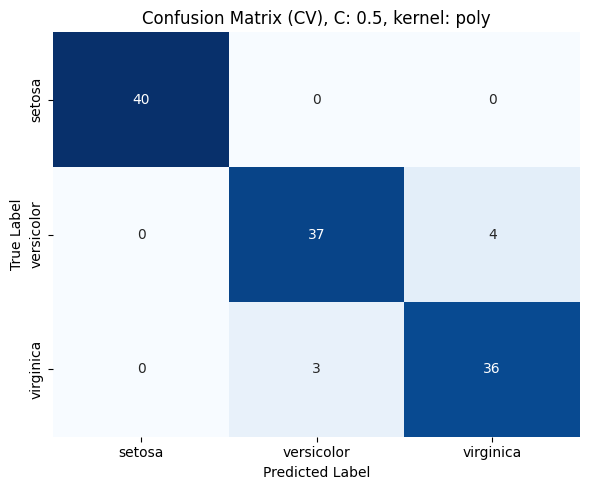

----------------------------------------
C: 5
kernel: linear
Accuracy: 0.9583
Confusion Matrix (rows=True labels, cols=Predicted):


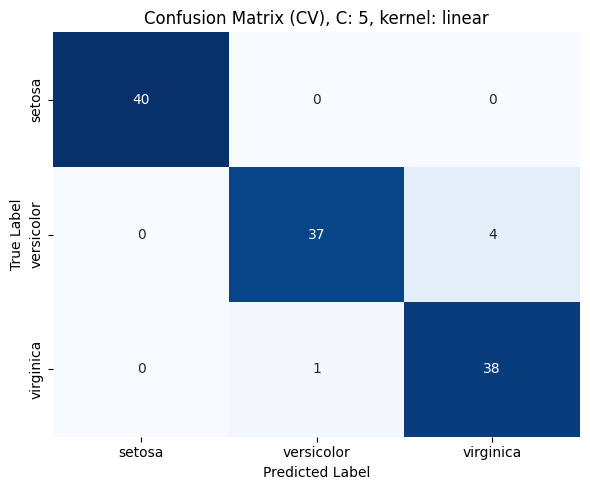

----------------------------------------
C: 5
kernel: poly
Accuracy: 0.9417
Confusion Matrix (rows=True labels, cols=Predicted):


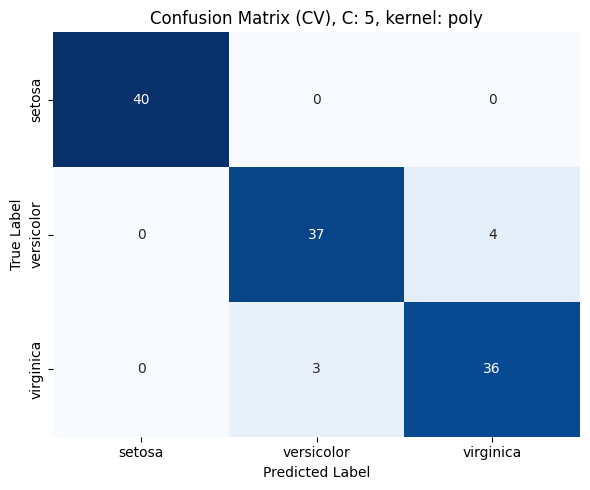

----------------------------------------

Best C, kernel based on CV: 0.5, linear with accuracy 0.9750

Test Accuracy: 1.0000
Test Confusion Matrix (rows=True labels, cols=Predicted):


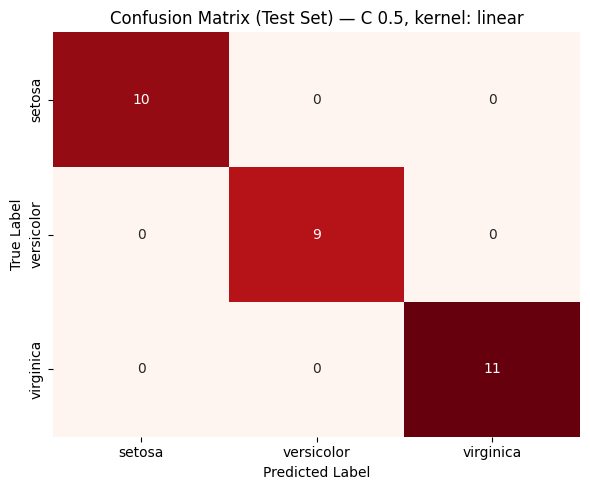

In [15]:
# Vary Regularization (Slack Penalty / C) and Kernels

# Split features and labels
X = iris_df.drop(columns=["Species"])
y = iris_df["Species"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)#  5 fold

C_range = [0.01, 0.5, 5]
kernels_range = ['linear', 'poly']

best_accuracy = 0
best_C = None
best_kernel = None

for C in C_range:
  for kernel in kernels_range:
    svm_model = SVC(C=C, kernel=kernel)

    # Cross-validated predictions
    y_pred = cross_val_predict(svm_model, X_train, y_train, cv=kf)

    # Accuracy
    acc = accuracy_score(y_train, y_pred)

    # Save best model info
    if acc > best_accuracy:
        best_accuracy = acc
        best_C = C
        best_kernel = kernel

    # Confusion Matrix
    class_labels = iris_df["Species"].unique()
    cm = confusion_matrix(y_train, y_pred, labels=class_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    # Print cross-validation results for this max_depth value
    print(f"C: {C}")
    print(f"kernel: {kernel}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix (rows=True labels, cols=Predicted):")
    plot_confusion_matrix(cm_df, f"Confusion Matrix (CV), C: {C}, kernel: {kernel}", mode="train")
    print("-" * 40)

# Final evaluation on test set using best model
print(f"\nBest C, kernel based on CV: {best_C}, {best_kernel} with accuracy {best_accuracy:.4f}")

# Retrain on full training data
final_svm_model = SVC(C=best_C, kernel=best_kernel)
final_svm_model.fit(X_train, y_train)
y_test_pred = final_svm_model.predict(X_test)

# Test accuracy and confusion matrix
test_acc = accuracy_score(y_test, y_test_pred)
class_labels_test = iris_df["Species"].unique()
test_cm = confusion_matrix(y_test, y_test_pred, labels=class_labels_test)
test_cm_df = pd.DataFrame(test_cm, index=class_labels_test, columns=class_labels_test)

# Print results and confusion matrix on test set using best max_depth value
print(f"\nTest Accuracy: {test_acc:.4f}")
print("Test Confusion Matrix (rows=True labels, cols=Predicted):")
plot_confusion_matrix(test_cm_df, f"Confusion Matrix (Test Set) — C {best_C}, kernel: {best_kernel}", mode="test")



### Logistic Regression:

**Don't be fooled by the term "regression"! Logistic regression is a classification algorithm**

#### **Binary Logistic Regression**
Binary logistic regression is a classification algorithm used when the outcome (target) variable has only two possible classes—like yes/no, spam/not spam, or disease/no disease.

Imagine you're trying to predict whether a student will pass an exam based on how many hours they study. You might expect that as study time increases, the chance of passing also increases. But this chance doesn't rise indefinitely—it levels off.

This is where logistic regression shines:
- It models the probability smoothly using an S-shaped curve (called the sigmoid).
- It ensures the output is always between 0 and 1, so it's interpretable as a probability.

You can then use a threshold (often 0.5) to make a hard decision:
- If the model predicts a probability ≥ 0.5 → classify as "yes" (e.g., "will pass")
- Otherwise → classify as "no"

**Simplified Step by Step**
1. You feed in features (e.g., age, income, number of clicks, time studying, etc.).
2. The model weights these features to see how strongly they relate to the outcome.
3. It combines them into a single score, and then.
4. Applies a transformation (the sigmoid) that turn that score into a probability.
5. Based on this probability, it classifies the input into one of two categories.

#### **Multinomial Multivariate Logistic Regression**
It's logistic regression that can handle:
- **Multinomial outputs**: More than two classes (e.g. 3 or more labels)
- **Multivariate inputs**: Multiple features per sample

**Simplified Step by Step**
1. You feed in the input features. Each data point has multiple features.
2. For each possible class, the model learns its own set of weights (like separate mini binary classifiers).
3. [Softmax function] Converts all class scores into probabilities that sum to 1.
4. Prediction is through selecting the class with the highest probability.

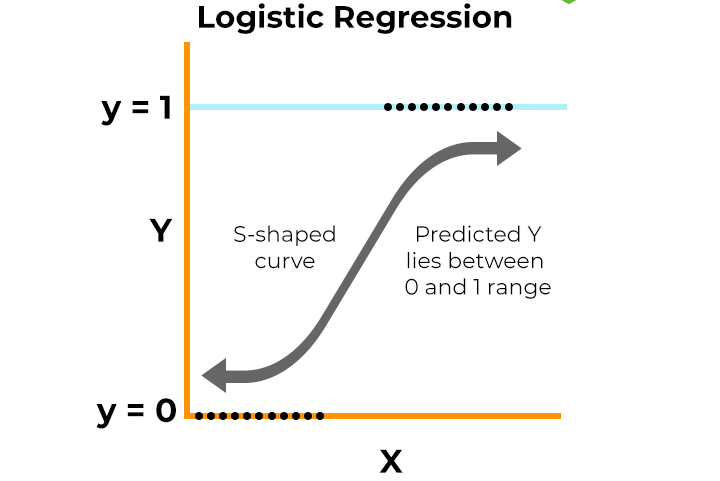



Test Accuracy: 0.9000
Test Confusion Matrix (rows=True labels, cols=Predicted):


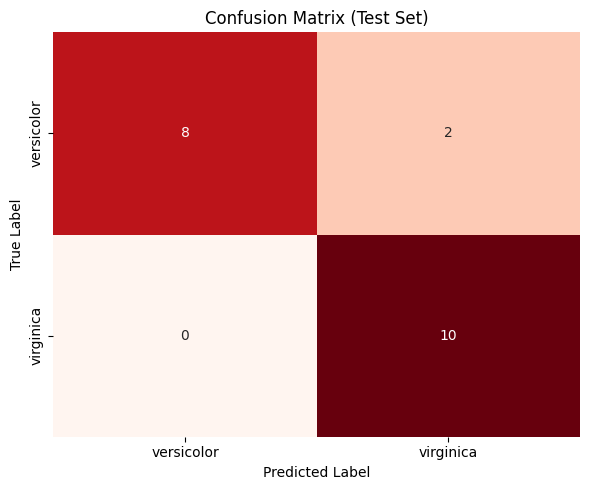

In [21]:
# EXAMPLE: Binary Logistic Regression

# 1. Filter to binary classification (keep only 2 classes)
binary_iris_df = iris_df[iris_df["Species"].isin(["versicolor", "virginica"])] # versicolor is class 0, virginica is class 1

# 2. Split features and labels
X = binary_iris_df.drop(columns=["Species"])
y = binary_iris_df["Species"]

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C = 1
model = LogisticRegression(C=C, solver="liblinear") # initialize logistic regression model

model.fit(X_train, y_train) # fit (train) SVM model on training set

y_test_pred = model.predict(X_test) # use fitted (trained) binary logistic regression model on test set

test_acc = accuracy_score(y_test, y_test_pred) # get accuracy of predictions

# produce confusion matrix
class_labels_test = binary_iris_df["Species"].unique()
test_cm = confusion_matrix(y_test, y_test_pred, labels=class_labels_test)

# Print results and confusion matrix on test set
test_cm_df = pd.DataFrame(test_cm, index=class_labels_test, columns=class_labels_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print("Test Confusion Matrix (rows=True labels, cols=Predicted):")
plot_confusion_matrix(test_cm_df, f"Confusion Matrix (Test Set)", mode="test")

C: 0.01
Accuracy: 0.5625
Confusion Matrix (rows=True labels, cols=Predicted):


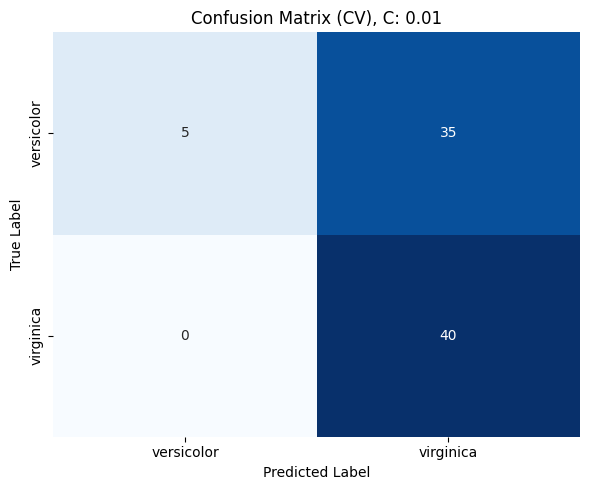

----------------------------------------
C: 0.1
Accuracy: 0.9625
Confusion Matrix (rows=True labels, cols=Predicted):


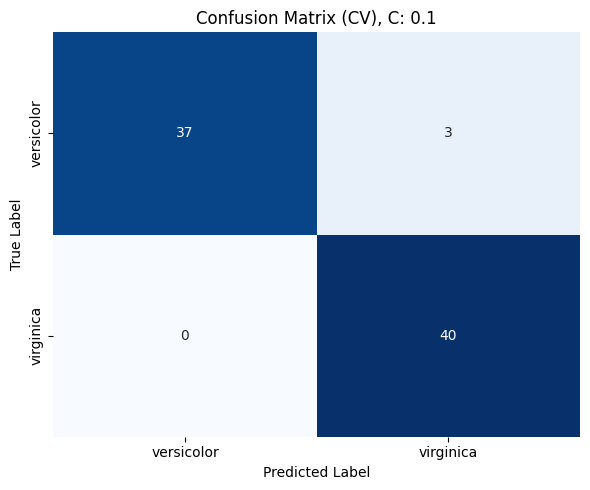

----------------------------------------
C: 1
Accuracy: 0.9750
Confusion Matrix (rows=True labels, cols=Predicted):


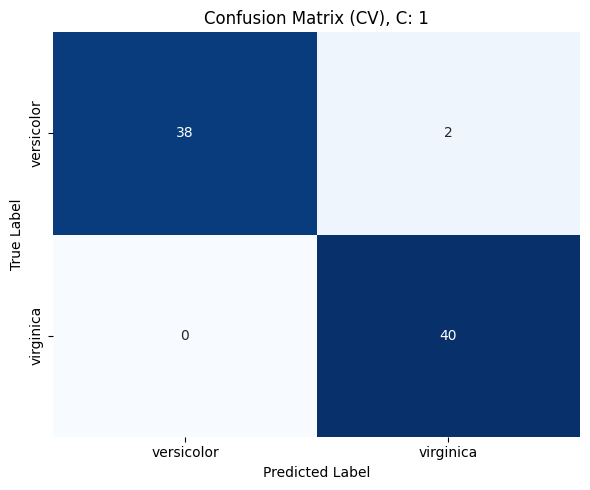

----------------------------------------
C: 10
Accuracy: 0.9875
Confusion Matrix (rows=True labels, cols=Predicted):


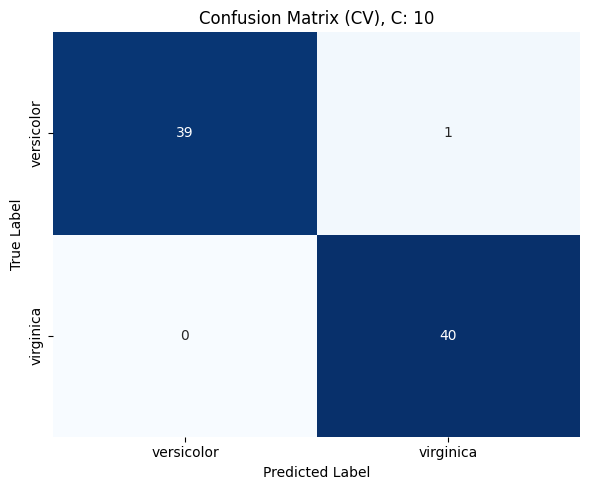

----------------------------------------
C: 100
Accuracy: 0.9750
Confusion Matrix (rows=True labels, cols=Predicted):


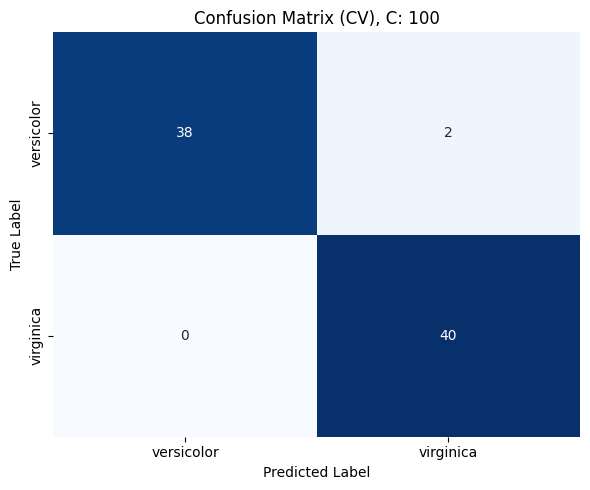

----------------------------------------

Best C based on CV: 10 with accuracy 0.9875

Test Accuracy: 0.8500
Test Confusion Matrix (rows=True labels, cols=Predicted):


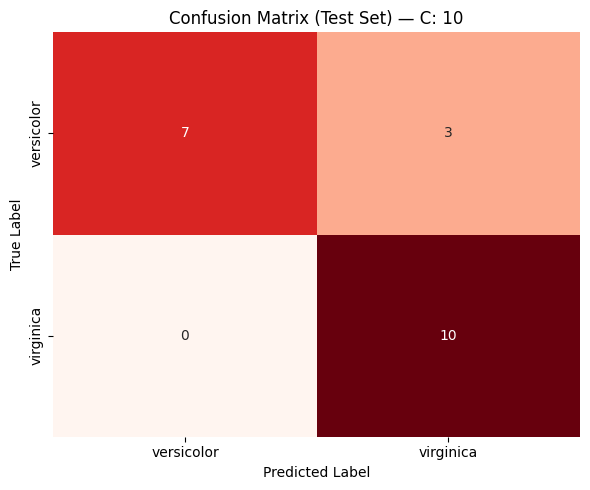

In [22]:
# Binary Logistic Regression Example

# 1. Filter to binary classification (keep only 2 classes)
binary_iris_df = iris_df[iris_df["Species"].isin(["versicolor", "virginica"])] # versicolor is class 0, virginica is class 1

# 2. Split features and labels
X = binary_iris_df.drop(columns=["Species"])
y = binary_iris_df["Species"]

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
C_range = [0.01, 0.1, 1, 10, 100]


best_accuracy = 0
best_C = None

for C in C_range:
    model = LogisticRegression(C=C, solver="liblinear")  # binary case
    y_pred = cross_val_predict(model, X_train, y_train, cv=kf)

    acc = accuracy_score(y_train, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_C = C

    class_labels = binary_iris_df["Species"].unique()
    cm = confusion_matrix(y_train, y_pred, labels=class_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    print(f"C: {C}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix (rows=True labels, cols=Predicted):")
    plot_confusion_matrix(cm_df, f"Confusion Matrix (CV), C: {C}", mode="train")
    print("-" * 40)

# 5. Final model evaluation on test set
print(f"\nBest C based on CV: {best_C} with accuracy {best_accuracy:.4f}")

final_model = LogisticRegression(C=best_C, solver="liblinear")
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)

test_acc = accuracy_score(y_test, y_test_pred)
test_class_labels = binary_iris_df["Species"].unique()
test_cm = confusion_matrix(y_test, y_test_pred, labels=test_class_labels)
test_cm_df = pd.DataFrame(test_cm, index=test_class_labels, columns=test_class_labels)

print(f"\nTest Accuracy: {test_acc:.4f}")
print("Test Confusion Matrix (rows=True labels, cols=Predicted):")
plot_confusion_matrix(test_cm_df, f"Confusion Matrix (Test Set) — C: {best_C}", mode="test")


Feature Importance (from final model):
Petal Width (cm): 5.7547
Petal Length (cm): 3.8632
Sepal Length (cm): -2.3485
Sepal Width (cm): -3.4184


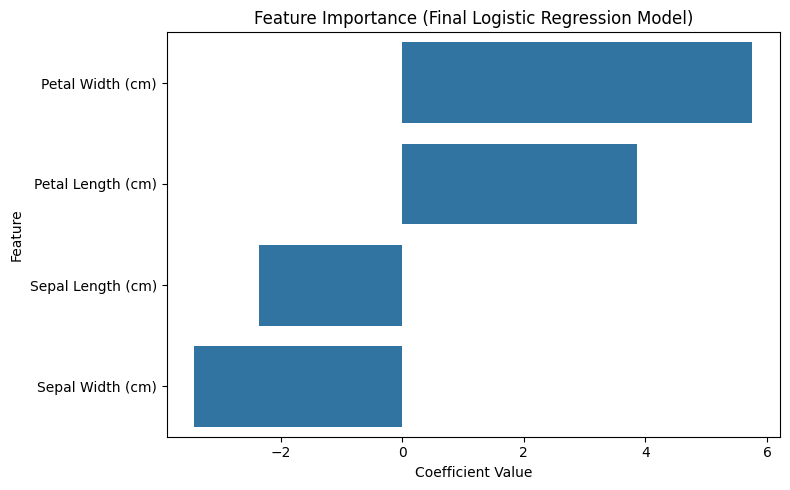

In [23]:
# Feature Importance (You can evaluate the learned coefficients of the logistic regression)
importance = pd.Series(final_model.coef_[0], index=X.columns)
importance = importance.sort_values(ascending=False)

print("\nFeature Importance (from final model):")
for feature, coef in importance.items():
    print(f"{feature}: {coef:.4f}")

# Optional: Bar plot of feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance (Final Logistic Regression Model)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()